<a href="https://colab.research.google.com/github/HibaBenHsouna1777/Manipulation-des-DataSets/blob/main/Manipulation_de_DataSet_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hiba ben hassouna  LSI3 tp8 :**



# ***Manipulation de DataSet Titanic***





### Importer les bibliothèques et charger les données

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')

### Vérifier la forme des données

In [4]:
titanic.shape

(891, 15)

### Vérifier les types de données

In [5]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


# **afficher les 10 premières lignes.**

In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Lister les colonnes contenant des valeurs manquantes.

In [34]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# Calculer la proportion de survivants (survived)

In [33]:
titanic['survived'].mean()*100

np.float64(38.38383838383838)

# Nettoyage et **préparation**

# Compter le nombre de passagers sans âge renseigné.

In [35]:
titanic['age'].isnull().sum()

np.int64(177)

# Remplacer les âges manquants par la moyenne.

In [47]:
titanic['age'].fillna({'age moyenne':titanic['age'].mean()},inplace=True)

# Supprimer les colonnes inutiles : deck, embark_town, alive.

In [52]:
titanic.drop(columns=['deck','embark_town','alive'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,True


# Créer une nouvelle colonne : fare_per_person

In [55]:
titanic['fare_per_person']=titanic['fare']/(titanic['parch']+titanic['sibsp']+1)

# verifier l ajout de nouvelle colonne

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   survived         891 non-null    int64   
 1   pclass           891 non-null    int64   
 2   sex              891 non-null    object  
 3   age              714 non-null    float64 
 4   sibsp            891 non-null    int64   
 5   parch            891 non-null    int64   
 6   fare             891 non-null    float64 
 7   embarked         889 non-null    object  
 8   class            891 non-null    category
 9   who              891 non-null    object  
 10  adult_male       891 non-null    bool    
 11  deck             203 non-null    category
 12  embark_town      889 non-null    object  
 13  alive            891 non-null    object  
 14  alone            891 non-null    bool    
 15  fare_per_person  891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4

# Calculer la moyenne d’âge des passagers et la moyenne de fare_per_person par classe


In [61]:
titanic.groupby('class')['age'].mean()

/tmp/ipython-input-81110152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['age'].mean()


,age
class,
First,38.233441
Second,29.877630
Third,25.140620


In [60]:
titanic.groupby('class')['fare_per_person'].mean()

/tmp/ipython-input-352825635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare_per_person'].mean()


,fare_per_person
class,
First,52.936943
Second,12.698832
Third,8.094756


# Calculer la moyenne de l’âge et du prix (fare) par sexe

In [64]:
titanic.groupby('sex')[['fare','age']].mean()

,fare,age
sex,,
female,44.479818,27.915709
male,25.523893,30.726645


# Identifier la classe ayant le tarif moyen le plus élevé.

In [69]:
titanic.groupby('class')['fare'].mean().sort_values(ascending=False).head(1)

/tmp/ipython-input-2628842925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].mean().sort_values(ascending=False).head(1)


,fare
class,
First,84.154687


# Comparer l’âge moyen des survivants et des non-survivants.

In [70]:
titanic.groupby('survived')['age'].mean()

,age
survived,
0,30.626179
1,28.343690


# histogramme de la distribution des âges

<Axes: xlabel='age', ylabel='Count'>

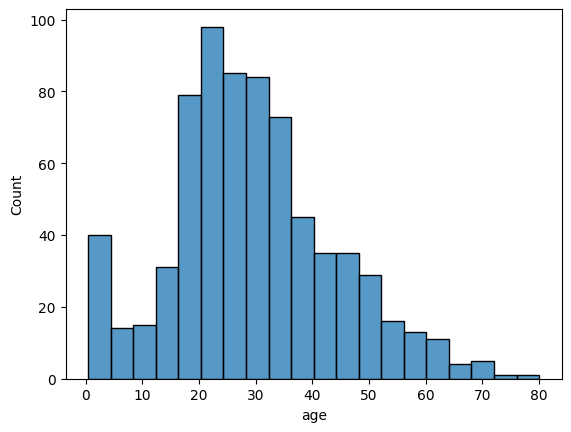

In [71]:
sns.histplot(titanic['age'])

la majorite des passagers ont l'age entre 20 et 40 ans

# boxplot du prix du billet (fare) par classe

Text(0.5, 1.0, 'prix du billet (fare) par classe')

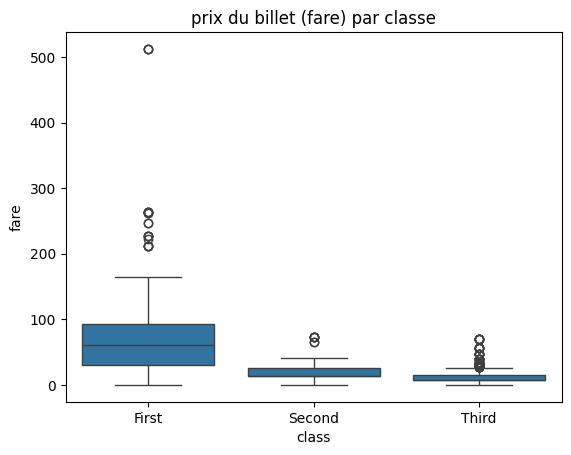

In [80]:

sns.boxplot(x='class' ,y='fare' , data =titanic)
plt.title('prix du billet (fare) par classe')


les passagers de la 1 ere classe ont paye puls de tarif de billet (entre 100) tandis que les passagers de la 3 eme classe ont paye des tarifs plus bas



# barplot du taux de survie par sexe.

Text(0.5, 1.0, 'probabilité de survie par genre')

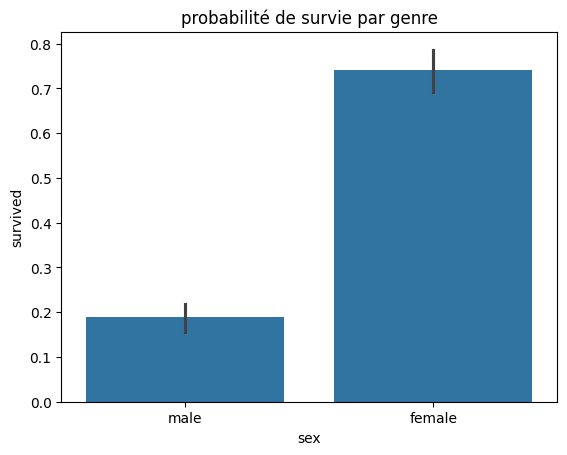

In [81]:
sns.barplot(x='sex',y='survived',data=titanic)
plt.title('probabilité de survie par genre')

ont constate le taux de survie chez les femmes est presque 3 fois  plus que le taux chez le hommes cela explique que les survivants de titanic sont de majorite femelle